<a href="https://colab.research.google.com/github/aka-hombre/MAT422/blob/main/MAT422_HW3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import re
import random
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from IPython.display import display, Latex
from sympy import *
from collections import Counter
from scipy.stats import poisson,norm, pearsonr
from scipy.integrate import quad

from mpl_toolkits import mplot3d

#3.4 Logistic Regression

The data we will be using has contains categorical values that contain various crops, along with their soil attribute: Nitrogen, Phosphorous, Potassium, and pH. We will be investigating which attributes are best predictor of crop type growing.

In [43]:
url = url = 'https://drive.google.com/uc?export=download&id=1lAcBpLN5aYE6S1wFY3QHQFiD05S9d_2o' #loading in data

data = pd.read_csv(url)
data.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


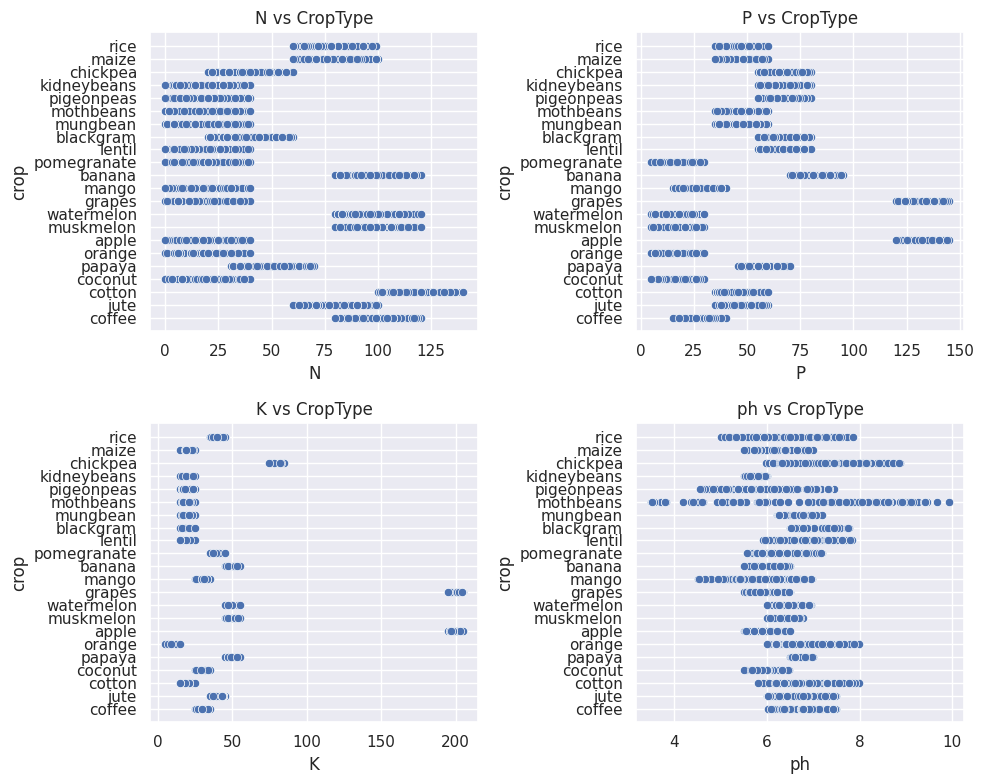

In [42]:
sns.set_theme()

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Iterate over the soil attribute and crop type
for ax, col in zip(axes.flatten(), data.columns[:4]):
    sns.scatterplot(data=data, x=col, y='crop', ax=ax)
    ax.set_title(f"{col} vs CropType")

plt.tight_layout()

From our plots, it seems Phosphorus levels are a good predictor of grape and appe crop type. We will be using the seaborne library to plot our logistic regression plots

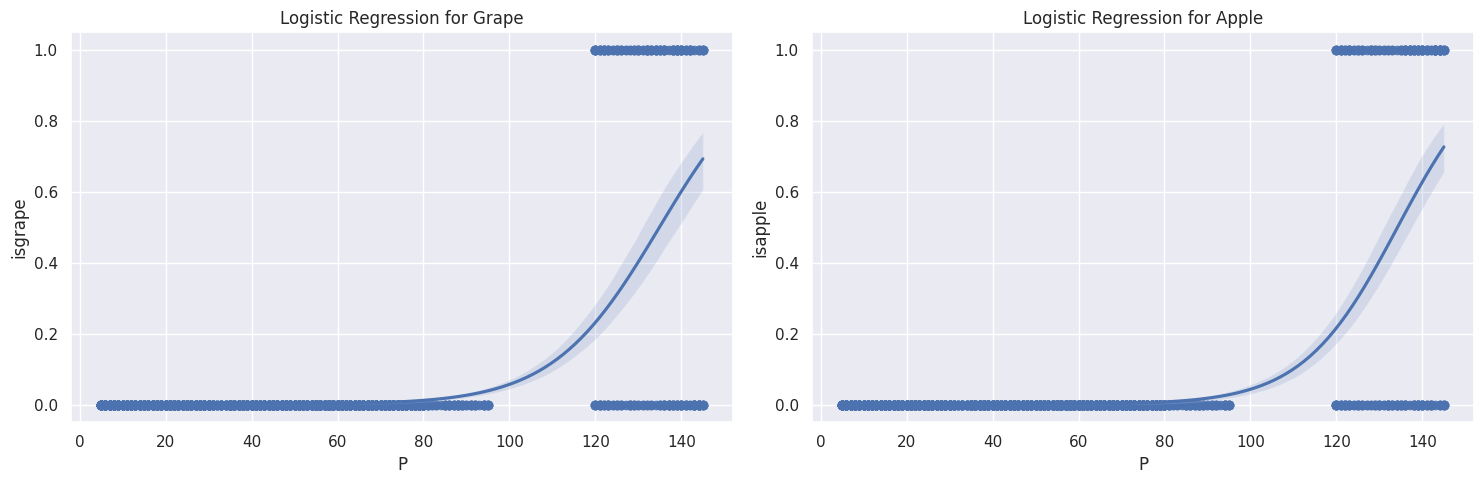

In [55]:
# Replace specified crop type with 0 and everything else with 1
data['isgrape'] = data['crop'].apply(lambda x: 1 if x == 'grapes' else 0)
data['isapple'] = data['crop'].apply(lambda x: 1 if x == 'apple' else 0)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.regplot(data=data, x="P", y='isgrape', logistic=True, ax=axes[0])
axes[0].set_title("Logistic Regression for Grape")

sns.regplot(data=data, x="P", y='isapple', logistic=True, ax=axes[1])
axes[1].set_title("Logistic Regression for Apple")

plt.tight_layout()
plt.show()

Let's build our own logistic regression model using sklearn.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


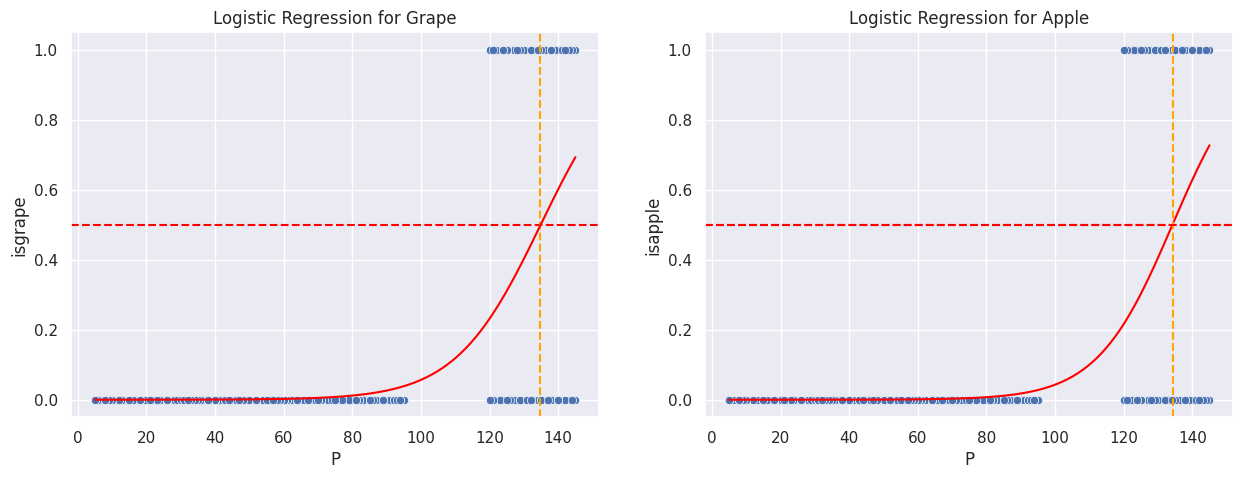

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Fit logistic regression model
modelg = LogisticRegression()
modelg.fit(data[["P"]], data[["isgrape"]])

modela = LogisticRegression()
modela.fit(data[["P"]], data[["isapple"]])

# Generate a range of values for crop to plot the curve
P = np.linspace(data["P"].min(), data["P"].max(), 300).reshape(-1, 1)
grape_prob = modelg.predict_proba(P)[:, 1]  # Get probabilities for class 1
apple_prob = modela.predict_proba(P)[:, 1]


# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5));

sns.scatterplot(data=data, x="P", y='isgrape', ax=axes[0])
axes[0].axhline(y=0.5, color='red', linestyle='--')

intersection_grape = P[np.where(np.isclose(grape_prob, 0.5, atol=1e-2))] #finding when the logstic equation intersects 0.5
axes[0].axvline(x=intersection_grape[0], color='orange', linestyle='--')
axes[0].plot(P, grape_prob, color='red')
axes[0].set_title("Logistic Regression for Grape");

sns.scatterplot(data=data, x="P", y='isapple', ax=axes[1])
axes[1].axhline(y=0.5, color='red', linestyle='--')
axes[1].plot(P, apple_prob, color='red')

intersection_apple = P[np.where(np.isclose(apple_prob, 0.5, atol=1e-2))] #finding when the logstic equation intersects 0.5
axes[1].axvline(x=intersection_apple[0], color='orange', linestyle='--')
axes[1].axhline(y=0.5, color='red', linestyle='--')
axes[1].set_title("Logistic Regression for Apple");

plt.show();

We know the logistic model changes inflection when $f(x)=0.5$, so we were able to plot the critical value on the plot.